In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!git clone https://github.com/taehojo/data-ch20.git

fatal: destination path 'data-ch20' already exists and is not an empty directory.


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

In [6]:
train_generator = train_datagen.flow_from_directory('./data-ch20/train', target_size=(150,150), batch_size=5, class_mode='binary')

Found 160 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
test_generator = test_datagen.flow_from_directory('./data-ch20/test', target_size=(150,150), batch_size=5, class_mode='binary')

Found 120 images belonging to 2 classes.


In [9]:
#VGG16모델 불러오기
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False

In [10]:
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 activation_1 (Activation)   (None, 1)                 0

In [11]:
finetune_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

In [12]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [13]:
history = finetune_model.fit(train_generator, epochs=20, validation_data=test_generator,
                             validation_steps=10, callbacks=[early_stopping_callback])

Epoch 1/20
32/32 [==============================] - 35s 1s/step - loss: 0.7098 - accuracy: 0.6125 - val_loss: 0.5659 - val_accuracy: 0.7400
Epoch 2/20
32/32 [==============================] - 37s 1s/step - loss: 0.5447 - accuracy: 0.7312 - val_loss: 0.4575 - val_accuracy: 0.8200
Epoch 3/20
32/32 [==============================] - 38s 1s/step - loss: 0.4645 - accuracy: 0.8062 - val_loss: 0.4432 - val_accuracy: 0.8200
Epoch 4/20
32/32 [==============================] - 38s 1s/step - loss: 0.3727 - accuracy: 0.8813 - val_loss: 0.3539 - val_accuracy: 0.8800
Epoch 5/20
32/32 [==============================] - 39s 1s/step - loss: 0.3869 - accuracy: 0.8375 - val_loss: 0.3456 - val_accuracy: 0.8400
Epoch 6/20
32/32 [==============================] - 39s 1s/step - loss: 0.3498 - accuracy: 0.8938 - val_loss: 0.2514 - val_accuracy: 0.9400
Epoch 7/20
32/32 [==============================] - 41s 1s/step - loss: 0.3282 - accuracy: 0.8625 - val_loss: 0.3346 - val_accuracy: 0.8600
Epoch 8/20
32/32 [==

In [14]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

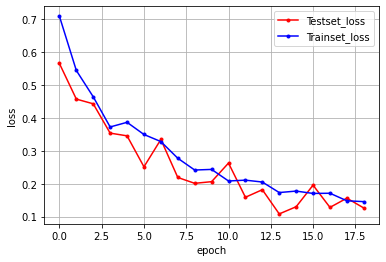

In [16]:
#그래프
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()